In [96]:
import pandas as pd
import os
import ast

In [97]:
# Importing the CSV and saving it as a Pandas DataFrame

pwd = os.getcwd()
filepath = pwd + '/case1.csv'
city_data = pd.read_csv(filepath)
del city_data['index']
city_data.rename(columns = {'key': 'City'}, inplace = True)
city_data

# Description of the CSV: This file contains championship data from 1870-2018, including teams, sports, and results.

# "key" column: city, state
# "values" column: list of dictionaries; each dictionary is a year (ascending) that a team from that city won a championship
# "seasons" column: how many seasons of each sports league have taken place in the city

,City,values,population,seasons
0,"Green Bay, WI","[{'year': 1929, 'team': 'Green Bay Packers', '...",320050,"{'mlb': 0, 'nba': 0, 'nfl': 97, 'nhl': 0, 'mls..."
1,"Sarnia, ON","[{'year': 1934, 'team': 'Sarnia Imperials', 's...",96151,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'..."
2,"Hamilton, ON","[{'year': 1912, 'team': 'Hamilton Alerts', 'sp...",747545,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 5, 'mls'..."
3,"Regina, SK","[{'year': 1966, 'team': 'Saskatchewan Roughrid...",236481,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'..."
4,"Edmonton, AB","[{'year': 1954, 'team': 'Edmonton Eskimos', 's...",1321426,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 39, 'mls..."
...,...,...,...,...
313,"Harrison, NY",[],28340,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'..."
314,"Orange City, IA",[],6179,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'..."
315,"Bolivar, MO",[],10795,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'..."
316,"Kirksville, MO",[],17519,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'..."


In [98]:
# Each "values" value is a string, it needs to be a list of dictionaries

# Remove the brackets at the beginning of each string
def remove_brackets(string):
    remove_front = string.replace('[', '')
    remove_back = remove_front.replace(']', '')
    return remove_back


In [99]:
# Turn the string into a list, separated by dictionary brackets

def string_to_list(string):
    new_list = []
    new_string = ''
    for i in string:
        if i == '{':
            new_string += i
        elif i == '}':
            new_string += i
            new_list.append(new_string)
            new_string = ''
        else:
            new_string += i
    return new_list


In [100]:
# Remove the ', ' that is at the beginning of every string after the first one in the list

def remove_comma_space(team_list):
    new_team_list = []
    for i in team_list:
        if i[0] == '{':
            new_team_list.append(i)
        else:
            new_team = i[2:]
            new_team_list.append(new_team)
    return new_team_list


In [101]:
# Finally, transform each item in the list from a string into a dictionary. We can now count and manipulate the dictionaries.

def strings_to_dicts(list_of_strings):
    list_of_dicts = []
    for i in list_of_strings:
        result = ast.literal_eval(i)
        list_of_dicts.append(result)
    return list_of_dicts


In [102]:
# Replace the values column (string values) with a new values column that contains lists of dictionaries. 
# Each dictionary contains information about a team that won a championship from that city (year, team, and sport).

champions = []
values_list = city_data['values']

for value in values_list:
    rb = remove_brackets(value)
    stl = string_to_list(rb)
    rcs = remove_comma_space(stl)
    final = strings_to_dicts(rcs)
    champions.append(final)

city_data['values'] = champions
city_data['# of City Championships'] = city_data['values'].str.len()
city_data

,City,values,population,seasons,# of City Championships
0,"Green Bay, WI","[{'year': 1929, 'team': 'Green Bay Packers', '...",320050,"{'mlb': 0, 'nba': 0, 'nfl': 97, 'nhl': 0, 'mls...",14
1,"Sarnia, ON","[{'year': 1934, 'team': 'Sarnia Imperials', 's...",96151,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",2
2,"Hamilton, ON","[{'year': 1912, 'team': 'Hamilton Alerts', 'sp...",747545,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 5, 'mls'...",15
3,"Regina, SK","[{'year': 1966, 'team': 'Saskatchewan Roughrid...",236481,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",4
4,"Edmonton, AB","[{'year': 1954, 'team': 'Edmonton Eskimos', 's...",1321426,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 39, 'mls...",19
...,...,...,...,...,...
313,"Harrison, NY",[],28340,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0
314,"Orange City, IA",[],6179,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0
315,"Bolivar, MO",[],10795,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0
316,"Kirksville, MO",[],17519,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0


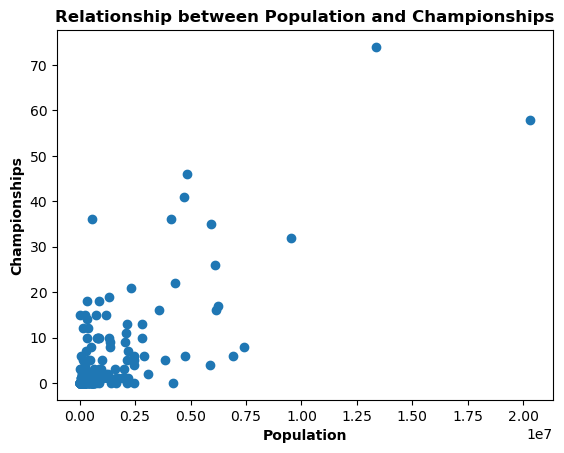

In [103]:
# Plot relationship of population vs. # of championships

import matplotlib.pyplot as plt
import numpy as np

x = np.array(city_data['population'])
y = np.array(city_data['# of City Championships'])

plt.scatter(x, y)
#plt.ticklabel_format(style = 'plain')
plt.xlabel('Population', fontweight = 'bold')
plt.ylabel('Championships', fontweight = 'bold')
plt.title('Relationship between Population and Championships', fontweight = 'bold')
plt.show()

In [104]:
# Remove the outliers to have a better visual

x_sorted = np.sort(x)
x_high_to_low = x_sorted[::-1]
print(x_high_to_low[0:10])

[20320876 13353907  9533040  7399662  6892427  6216589  6158824  6096120
  5928040  5884736]


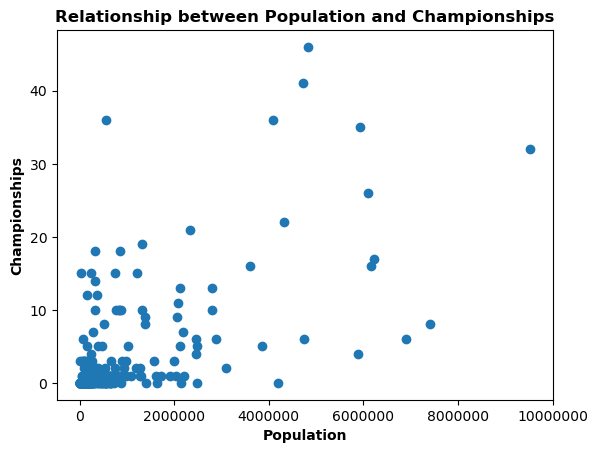

In [105]:
x_high_one = x_high_to_low[0]
x_high_two = x_high_to_low[1]

index_one = np.where(x == x_high_one) # index 20
index_two = np.where(x == x_high_two) # index 25

x2 = np.delete(x, 25)
x2 = np.delete(x2, 20)
y2 = np.delete(y, 25)
y2 = np.delete(y2, 20)

plt.scatter(x2, y2)
plt.ticklabel_format(style = 'plain')
plt.xlabel('Population', fontweight = 'bold')
plt.ylabel('Championships', fontweight = 'bold')
plt.title('Relationship between Population and Championships', fontweight = 'bold')
plt.show()

In [106]:
# This shows that when removing the largest two outliers in terms of population
# there is not direct correlation between the population of a city and the total sports championships it has.
# However, cities with larger populations tend to have at least one championship.
# Most cities have close to, if not zero sports championships.

np.corrcoef(x, y)

array([[1.        , 0.76629132],
       [0.76629132, 1.        ]])

In [107]:
np.corrcoef(x2, y2)

array([[1.        , 0.64001529],
       [0.64001529, 1.        ]])

In [108]:

# Next is an analysis of the amount of National Hockey League champoinships each city has gotten.

nhl_champs = []
all_champs = city_data['values']

# Nested for loop to get the total number of championship seasons by sport for each city.

for champ_list in all_champs: 
    city_nhl_champs = 0
    for champ_dictionary in champ_list: 
        for key, value in champ_dictionary.items():
            if key == 'sport':
                if value == 'nhl':
                    city_nhl_champs += 1
    nhl_champs.append(city_nhl_champs)

city_data['NHL Championships'] = nhl_champs
city_data

,City,values,population,seasons,# of City Championships,NHL Championships
0,"Green Bay, WI","[{'year': 1929, 'team': 'Green Bay Packers', '...",320050,"{'mlb': 0, 'nba': 0, 'nfl': 97, 'nhl': 0, 'mls...",14,0
1,"Sarnia, ON","[{'year': 1934, 'team': 'Sarnia Imperials', 's...",96151,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",2,0
2,"Hamilton, ON","[{'year': 1912, 'team': 'Hamilton Alerts', 'sp...",747545,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 5, 'mls'...",15,0
3,"Regina, SK","[{'year': 1966, 'team': 'Saskatchewan Roughrid...",236481,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",4,0
4,"Edmonton, AB","[{'year': 1954, 'team': 'Edmonton Eskimos', 's...",1321426,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 39, 'mls...",19,5
...,...,...,...,...,...,...
313,"Harrison, NY",[],28340,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0,0
314,"Orange City, IA",[],6179,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0,0
315,"Bolivar, MO",[],10795,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0,0
316,"Kirksville, MO",[],17519,"{'mlb': 0, 'nba': 0, 'nfl': 0, 'nhl': 0, 'mls'...",0,0


In [109]:
# nhl championships per total championships in a column
# championships for nhl per city, plot this in a matplot bar graph
# mask ?

In [112]:
# Creating a new data frame to analyze NHL championships per city

nhl_data = city_data[['City', '# of City Championships', 'NHL Championships']]

# New column displaying the % of NHL / Total City Championships

nhl_v2 = nhl_data.copy()
nhl_v2['NHL Percentage of Total'] = (nhl_v2['NHL Championships'] / nhl_v2['# of City Championships'] * 100).round(2)

# Creating a mask to filter out cities with 0 NHL championships

mask = nhl_v2['NHL Championships'] != 0
nhl_totals = nhl_v2[mask]

# NHL % highest to lowest

nhl_totals = nhl_totals.sort_values(by = ['NHL Percentage of Total'], ascending = False)
nhl_totals

,City,# of City Championships,NHL Championships,NHL Percentage of Total
7,"Montreal, QC",36,27,75.00
12,"Metro Detroit, MI",22,11,50.00
41,"Tampa Bay Area, FL",2,1,50.00
10,"Toronto, ON",35,12,34.29
24,"Denver, CO",6,2,33.33
4,"Edmonton, AB",19,5,26.32
9,"Pittsburgh, PA",21,5,23.81
20,New York Metro Area,58,11,18.97
18,"Chicago, IL",32,6,18.75
8,"Greater Boston, MA",46,6,13.04
